In [ ]:
from torchvision import models
import torch
import torch.nn as nn


Loading the all three models

In [2]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved ResNet-50 model
resnet_model = models.resnet50(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 1000)  # Adjust to match the original model's output units
resnet_model.load_state_dict(torch.load('/home/pushan/Desktop/ML/ML_PROJECT/4628934/final_files/resnet.pth', map_location=device))
resnet_model = resnet_model.to(device)  # Move the model to GPU or CPU
resnet_model.eval()

# Create a new ResNet-50 model with the correct final layer
new_resnet_model = models.resnet50(pretrained=True)
new_resnet_model.fc = nn.Linear(new_resnet_model.fc.in_features, 2)  # Adjust to match the desired output units
new_resnet_model = new_resnet_model.to(device)  # Move the new model to GPU or CPU

# Copy the weights and biases from the loaded model to the new model
new_resnet_model.fc.weight.data = resnet_model.fc.weight.data[0:2].to(device)  # Copy only the first 2 output units and move to GPU
new_resnet_model.fc.bias.data = resnet_model.fc.bias.data[0:2].to(device)

/home/pushan/anaconda3/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pushan/anaconda3/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_168078/2911302342.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob

In [7]:
# Load the saved VGG16 model
vgg_model = models.vgg19(pretrained=True)
vgg_model.classifier[6] = nn.Linear(vgg_model.classifier[6].in_features, 1000)  # Adjust to match the original model's output units
vgg_model.load_state_dict(torch.load('/home/pushan/Desktop/ML/ML_PROJECT/4628934/final_files/vggnet.pth', map_location=device))
vgg_model = vgg_model.to(device)  # Move the model to GPU or CPU
vgg_model.eval()

# Create a new VGG16 model with the correct final layer
new_vgg_model = models.vgg19(pretrained=True)
new_vgg_model.classifier[6] = nn.Linear(new_vgg_model.classifier[6].in_features, 2)  # Adjust to match the desired output units
new_vgg_model = new_vgg_model.to(device)  # Move the new model to GPU or CPU

# Copy the weights and biases from the loaded model to the new model
new_vgg_model.classifier[6].weight.data = vgg_model.classifier[6].weight.data[0:2].to(device)  # Copy only the first 2 output units and move to GPU
new_vgg_model.classifier[6].bias.data = vgg_model.classifier[6].bias.data[0:2].to(device)


/tmp/ipykernel_168078/2992101551.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg_model.load_state_dict(torch.load('/home/pushan/Desktop/ML/ML_PROJECT/4628934/final_f

In [8]:
# Load the saved EfficientNet model
efficientnet_model = models.efficientnet_b0(pretrained=True)  # Or another EfficientNet variant
efficientnet_model.classifier[1] = nn.Linear(efficientnet_model.classifier[1].in_features, 1000)  # Adjust to match the original model's output units
efficientnet_model.load_state_dict(torch.load('/home/pushan/Desktop/ML/ML_PROJECT/4628934/final_files/efficientNet.pth', map_location=device))
efficientnet_model = efficientnet_model.to(device)  # Move the model to GPU or CPU
efficientnet_model.eval()

# Create a new EfficientNet model with the correct final layer
new_efficientnet_model = models.efficientnet_b0(pretrained=True)  # Or another EfficientNet variant
new_efficientnet_model.classifier[1] = nn.Linear(new_efficientnet_model.classifier[1].in_features, 2)  # Adjust to match the desired output units
new_efficientnet_model = new_efficientnet_model.to(device)  # Move the new model to GPU or CPU

# Copy the weights and biases from the loaded model to the new model
new_efficientnet_model.classifier[1].weight.data = efficientnet_model.classifier[1].weight.data[0:2].to(device)  # Copy only the first 2 output units and move to GPU
new_efficientnet_model.classifier[1].bias.data = efficientnet_model.classifier[1].bias.data[0:2].to(device)


/home/pushan/anaconda3/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_168078/3766249967.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will

Dataloaders and preprocessing

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [11]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Define the data directory
data_dir = '/home/pushan/Desktop/ML/ML_PROJECT/4628934/roi_extracted'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val', 'test']}
#image_datasets

In [13]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 6452, 'val': 806, 'test': 809}


['cocci', 'healthy', 'ncd', 'salmo']

Test of majority voting model

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch
import numpy as np

# Set models to evaluation mode
resnet_model.eval()
vgg_model.eval()
efficientnet_model.eval()
criterion = nn.CrossEntropyLoss()

# Initialize test accuracy and loss
test_loss = 0.0
correct_predictions = 0

# Initialize lists to store predictions and true labels for the confusion matrix
all_preds = []
all_labels = []

# Turn off gradients for validation (saves memory and computations)
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass for each model
        resnet_outputs = resnet_model(inputs)
        vgg_outputs = vgg_model(inputs)
        efficientnet_outputs = efficientnet_model(inputs)

        # Get predictions from each model
        _, resnet_preds = torch.max(resnet_outputs, 1)
        _, vgg_preds = torch.max(vgg_outputs, 1)
        _, efficientnet_preds = torch.max(efficientnet_outputs, 1)

        # Majority voting - Get the most frequent prediction
        stacked_preds = torch.stack([resnet_preds, vgg_preds, efficientnet_preds], dim=1)
        majority_preds, _ = torch.mode(stacked_preds, dim=1)

        # Calculate accuracy
        correct_predictions += torch.sum(majority_preds == labels.data)
        all_preds.extend(majority_preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate loss (use the average of all models' losses)
        resnet_loss = criterion(resnet_outputs, labels)
        vgg_loss = criterion(vgg_outputs, labels)
        efficientnet_loss = criterion(efficientnet_outputs, labels)
        loss = (resnet_loss + vgg_loss + efficientnet_loss) / 3
        test_loss += loss.item() * inputs.size(0)

# Calculate average loss and accuracy
test_loss = test_loss / dataset_sizes['test']
test_acc = correct_predictions.double() / dataset_sizes['test']

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


Test Loss: 0.4058, Test Accuracy: 0.9184


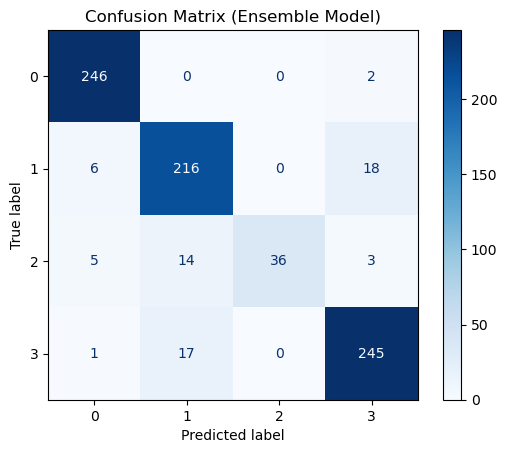

In [17]:

# Compute and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Ensemble Model)")
plt.show()
